# Import Libraries

In [73]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import DataFrame

In [74]:
df = pd.read_csv('data/Salary_multiple.csv')

# Preprocessing

In [75]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


In [76]:
encoder = LabelEncoder()
df['Field'] = encoder.fit_transform(df['Field'])

In [77]:
df.head()

,YearsExperience,Field,Salary
0,1.1,1,39343.0
1,1.3,0,26205.0
2,1.5,1,37731.0
3,2.0,0,28525.0
4,2.2,1,39891.0


In [78]:
scaler = StandardScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

# Split to X and Y

In [79]:
X = df[['YearsExperience']].values
y = df['Salary']

In [80]:
X=X.reshape(-1,1)

# Split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Build Model

In [82]:
# Build the neural network model
model = Sequential([
    Dense(4, activation='linear', input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear'),
    # Dense(1, activation='linear')  # No activation function for output layer (regression problem)
])

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile

In [84]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error',metrics=['accuracy'])

In [85]:
len(X_train)

24

# Tensorboard

In [86]:
# log_dir = "logs/regression_tf/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/regression_tf/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [87]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8 , validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.0000e+00 - loss: 1.4330 - val_accuracy: 0.0000e+00 - val_loss: 1.2428
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 1.3334 - val_accuracy: 0.0000e+00 - val_loss: 1.2087
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 1.3818 - val_accuracy: 0.0000e+00 - val_loss: 1.1756
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 1.2036 - val_accuracy: 0.0000e+00 - val_loss: 1.1434
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 1.1806 - val_accuracy: 0.0000e+00 - val_loss: 1.1121
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 1.1322 - val_accuracy: 0.0000e+00 - val_loss: 1.0815
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 1.1709 - val_accuracy: 0.0000e+00 - val_loss: 1.0515
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+

In [88]:
y_pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [89]:
len(y_pred)

30

# Prediction

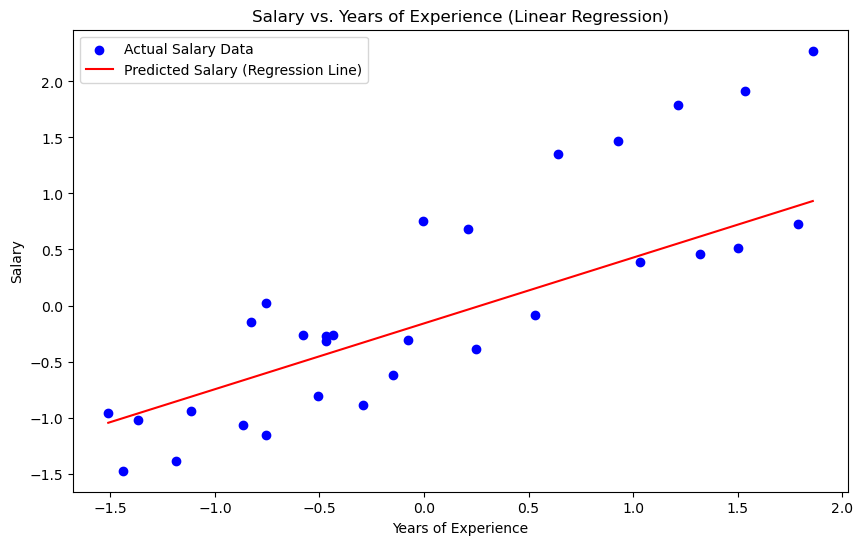

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Salary Data")
plt.plot(X, y_pred, color="red", label="Predicted Salary (Regression Line)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Years of Experience (Linear Regression)")
plt.legend()
plt.show()

# Get training Weights

In [91]:
model.layers[0].get_weights()

[array([[0.40664822, 0.7063611 , 0.06686988, 0.01357303]], dtype=float32),
 array([ 0.01217905, -0.02876804,  0.03114117, -0.06965353], dtype=float32)]

In [92]:
for layers in model.layers:
    print(layers.get_weights())

[array([[0.40664822, 0.7063611 , 0.06686988, 0.01357303]], dtype=float32), array([ 0.01217905, -0.02876804,  0.03114117, -0.06965353], dtype=float32)]
[array([[ 0.10214737],
       [ 0.78837574],
       [-0.33978698],
       [ 0.860775  ]], dtype=float32), array([-0.06750001], dtype=float32)]


# Evaluate the model

In [93]:

loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.4688
Test Loss: [0.46876898407936096, 0.0]


# Metrics

In [94]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


# Evaluate

In [95]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

In [96]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is :", r_squared)

The R2 error is : 0.6303816697638505


In [97]:
mean_absolute_error(y_test,y_pred)

0.4687690327902563

In [98]:
mean_squared_error(y_test,y_pred)

0.3724856011759711

# Visualize

In [99]:
from tensorflow.keras.models import Model

# Activation from Each Layer

In [100]:
def get_activations(model, layer_name, X):
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(X, verbose=False)
    print(activations)
    return activations


In [101]:
def plot_activations(layer_name, activations):
    print(f"Layer: {layer_name}")
    print(f"Activation Shape: {activations.shape}")

    if len(activations.shape) == 2:
        # 2D activations (Dense layers)
        plt.figure(figsize=(10, 5))
        plt.bar(range(activations.shape[1]), activations[0], color='skyblue')
        plt.title(f'Activations of {layer_name}')
        plt.xlabel('Neurons')
        plt.ylabel('Activation')
        plt.grid(True)
        plt.show()
    
    elif len(activations.shape) == 3:
        # 3D activations (Convolutional layers)
        num_channels = activations.shape[-1]
        for i in range(num_channels):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, :, :, i], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Channel {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    elif len(activations.shape) == 4:
        # 4D activations (Batches of 3D data, e.g., convolutional layers)
        num_samples = activations.shape[1]
        for i in range(num_samples):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, i, :, :], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Sample {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    else:
        print(f"Activation shape {activations.shape} not supported for visualization")

In [102]:
layer_names = [layer.name for layer in model.layers]

X_sample = X_train[23]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)

AttributeError: The layer sequential_3 has never been called and thus has no defined input.

[[ 0.35919476 -0.23420072 -0.03067764  0.00542336]]
Layer: dense_8
Activation Shape: (1, 4)


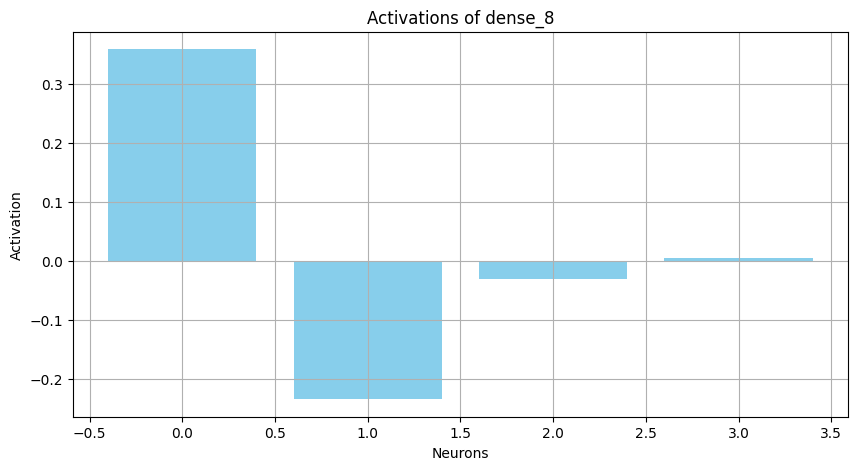

[[0.42725104]]
Layer: dense_9
Activation Shape: (1, 1)


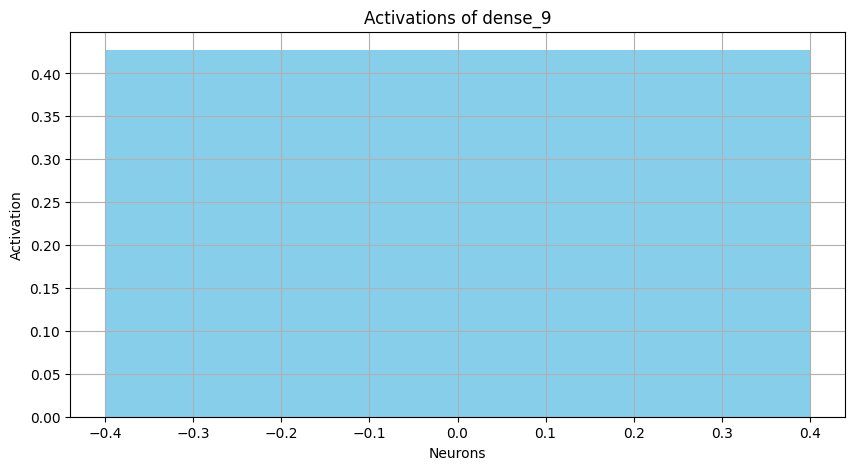

In [ ]:
layer_names = [layer.name for layer in model.layers]

X_sample = X_train[11]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)